In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_folder = '/content/drive/MyDrive/Python_Colab/Data/test'
train_folder = '/content/drive/MyDrive/Python_Colab/Data/train'
val_folder = '/content/drive/MyDrive/Python_Colab/Data/valid'

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=32
CHANNELS=1

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_folder,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale"
)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_folder,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_folder,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale"
)

Found 315 files belonging to 4 classes.
Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.


In [ ]:

test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [ ]:
# Model Zefnet
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define ZFNet model
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(96, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(256, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(1024, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model.build(input_shape=input_shape)


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=600,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 600

Epoch 1/600
20/20 [==============================] - 20s 249ms/step - loss: 2.0870 - accuracy: 0.3556 - val_loss: 1.2643 - val_accuracy: 0.2778
Epoch 2/600
20/20 [==============================] - 2s 115ms/step - loss: 1.3682 - accuracy: 0.3361 - val_loss: 1.2267 - val_accuracy: 0.3056
Epoch 3/600
20/20 [==============================] - 2s 110ms/step - loss: 1.2414 - accuracy: 0.4274 - val_loss: 1.0479 - val_accuracy: 0.5000
Epoch 4/600
20/20 [==============================] - 2s 109ms/step - loss: 1.4540 - accuracy: 0.3834 - val_loss: 1.3587 - val_accuracy: 0.3194
Epoch 5/600
20/20 [==============================] - 2s 109ms/step - loss: 1.3618 - accuracy: 0.3181 - val_loss: 1.2634 - val_accuracy: 0.3194
Epoch 6/600
20/20 [==============================] - 2s 110ms/step - loss: 1.0686 - accuracy: 0.4845 - val_loss: 0.9723 - val_accuracy: 0.4722
Epoch 7/600
20/20 [==============================] - 2s 110ms/step - loss: 1.0271 - accuracy: 0.4861 - val_loss: 0.9327 - val_accuracy: 0.500

In [ ]:
scores = model.evaluate(val_ds)
scores = model.evaluate(train_ds)
scores = model.evaluate(test_ds)

10/10 [==============================] - 54s 187ms/step - loss: 12.1150 - accuracy: 0.4381


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

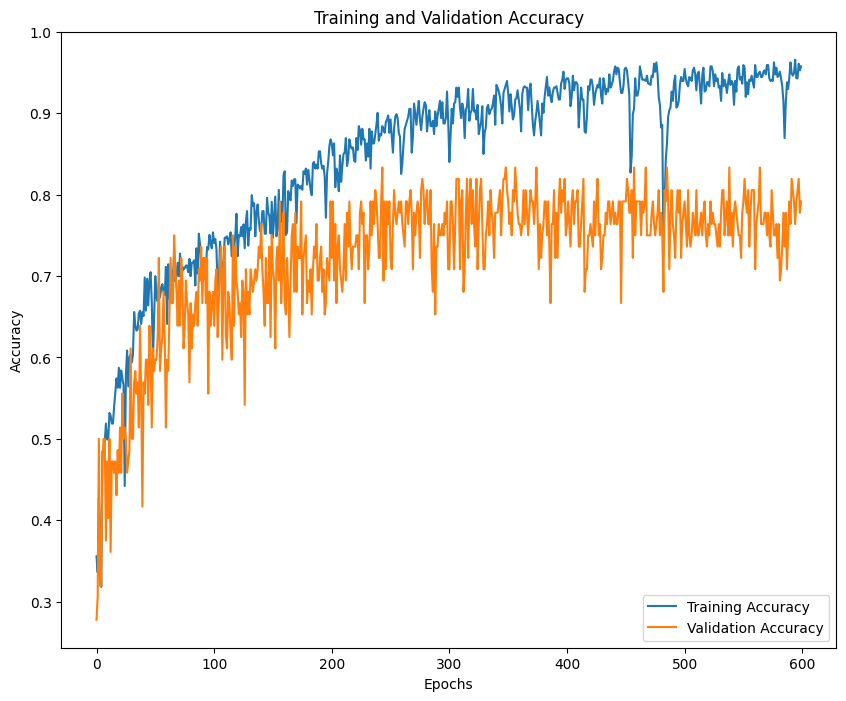

In [ ]:

plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')




plt.show()

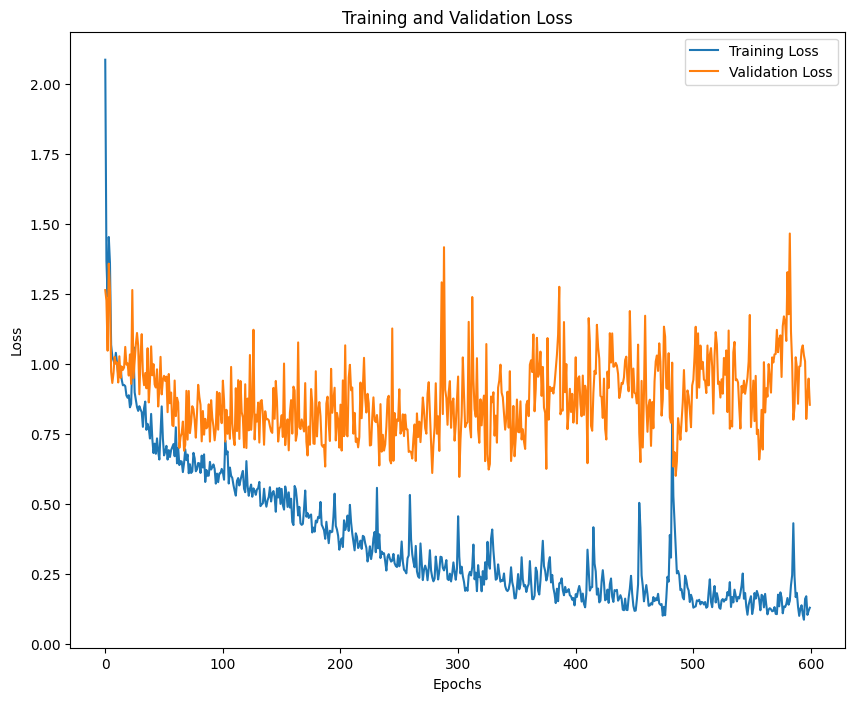

In [ ]:
plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 109, 109, 96)      4800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 54, 54, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                 

In [ ]:
# Model Zefnet
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define ZFNet model
model2 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(96, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(256, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(1024, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model2.build(input_shape=input_shape)


In [ ]:
model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model2.fit(
    train_ds,
    epochs=800,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 800

Epoch 1/800
20/20 [==============================] - 6s 126ms/step - loss: 4.3014 - accuracy: 0.2887 - val_loss: 1.3501 - val_accuracy: 0.2917
Epoch 2/800
20/20 [==============================] - 2s 111ms/step - loss: 1.2400 - accuracy: 0.4111 - val_loss: 1.0775 - val_accuracy: 0.3611
Epoch 3/800
20/20 [==============================] - 2s 110ms/step - loss: 0.9884 - accuracy: 0.5269 - val_loss: 0.9837 - val_accuracy: 0.3889
Epoch 4/800
20/20 [==============================] - 2s 116ms/step - loss: 0.9728 - accuracy: 0.5400 - val_loss: 1.0767 - val_accuracy: 0.4028
Epoch 5/800
20/20 [==============================] - 2s 118ms/step - loss: 1.1741 - accuracy: 0.4617 - val_loss: 1.0917 - val_accuracy: 0.4167
Epoch 6/800
20/20 [==============================] - 2s 113ms/step - loss: 1.0902 - accuracy: 0.4568 - val_loss: 1.2014 - val_accuracy: 0.3611
Epoch 7/800
20/20 [==============================] - 2s 115ms/step - loss: 1.0564 - accuracy: 0.5090 - val_loss: 0.9739 - val_accuracy: 0.4722

In [ ]:
scores = model2.evaluate(val_ds)
scores = model2.evaluate(train_ds)
scores = model2.evaluate(test_ds)

10/10 [==============================] - 0s 29ms/step - loss: 2.9187 - accuracy: 0.6444


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

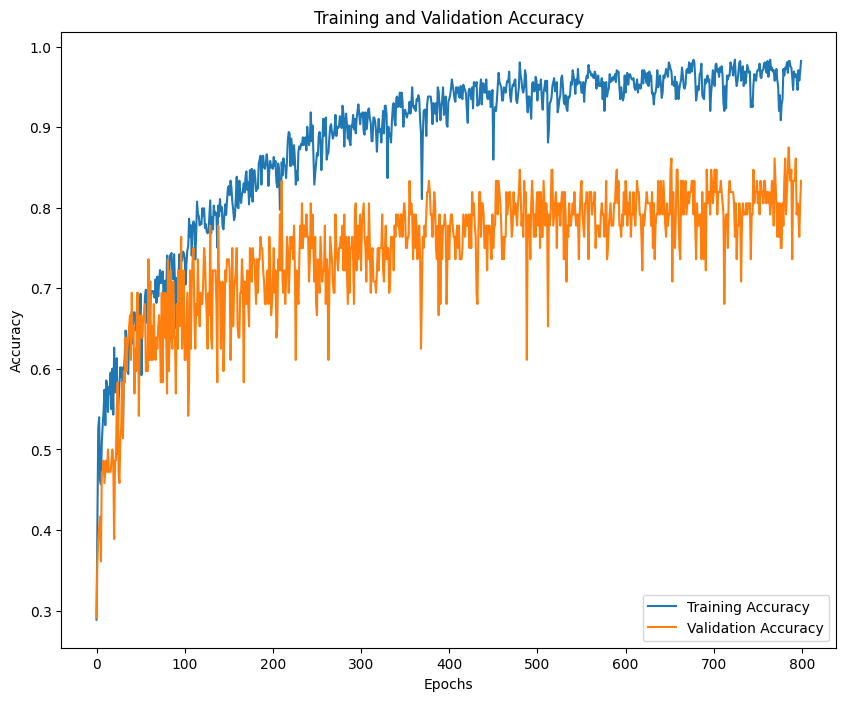

In [ ]:

plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')




plt.show()

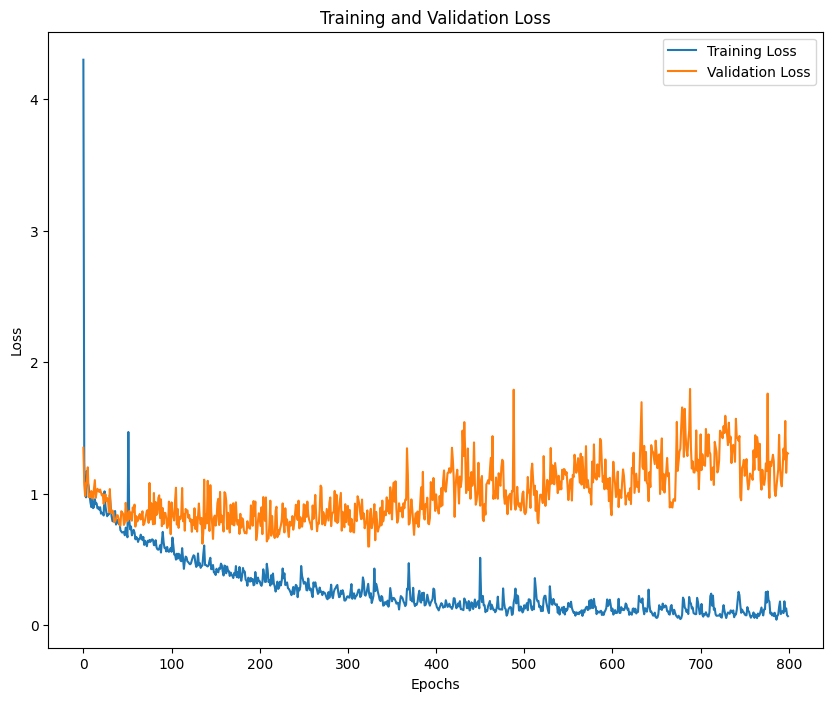

In [ ]:
plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **CNN**

In [ ]:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model3 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(128, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model3.build(input_shape=input_shape)

In [ ]:
model3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 1)       0         
                                                                 
 conv2d_10 (Conv2D)          (32, 222, 222, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 111, 111, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (32, 109, 109, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 54, 54, 128)         0         
 g2D)                                                 

In [ ]:
history = model3.fit(
    train_ds,
    epochs=600,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/600
20/20 [==============================] - 16s 312ms/step - loss: 1.3828 - accuracy: 0.2675 - val_loss: 1.2638 - val_accuracy: 0.2222
Epoch 2/600
20/20 [==============================] - 3s 140ms/step - loss: 1.2242 - accuracy: 0.4144 - val_loss: 1.1403 - val_accuracy: 0.4861
Epoch 3/600
20/20 [==============================] - 3s 144ms/step - loss: 1.1274 - accuracy: 0.4943 - val_loss: 1.1548 - val_accuracy: 0.3472
Epoch 4/600
20/20 [==============================] - 3s 148ms/step - loss: 1.1473 - accuracy: 0.4600 - val_loss: 1.0501 - val_accuracy: 0.3889
Epoch 5/600
20/20 [==============================] - 3s 138ms/step - loss: 1.0231 - accuracy: 0.5057 - val_loss: 0.9805 - val_accuracy: 0.5000
Epoch 6/600
20/20 [==============================] - 3s 137ms/step - loss: 0.9881 - accuracy: 0.5090 - val_loss: 0.9401 - val_accuracy: 0.5000
Epoch 7/600
20/20 [==============================] - 3s 137ms/step - loss: 0.9309 - accuracy: 0.5595 - val_loss: 0.9479 - val_accuracy: 0.458

In [ ]:
scores = model3.evaluate(val_ds)
scores = model3.evaluate(train_ds)
scores = model3.evaluate(test_ds)

10/10 [==============================] - 0s 39ms/step - loss: 4.3253 - accuracy: 0.5048


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

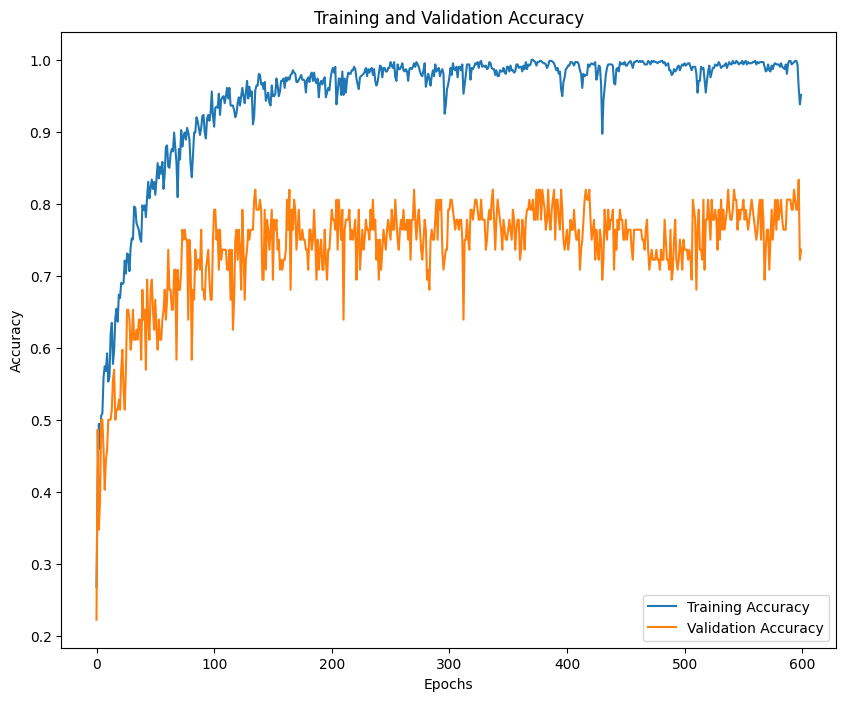

In [ ]:
EPOCH=600
plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')




plt.show()

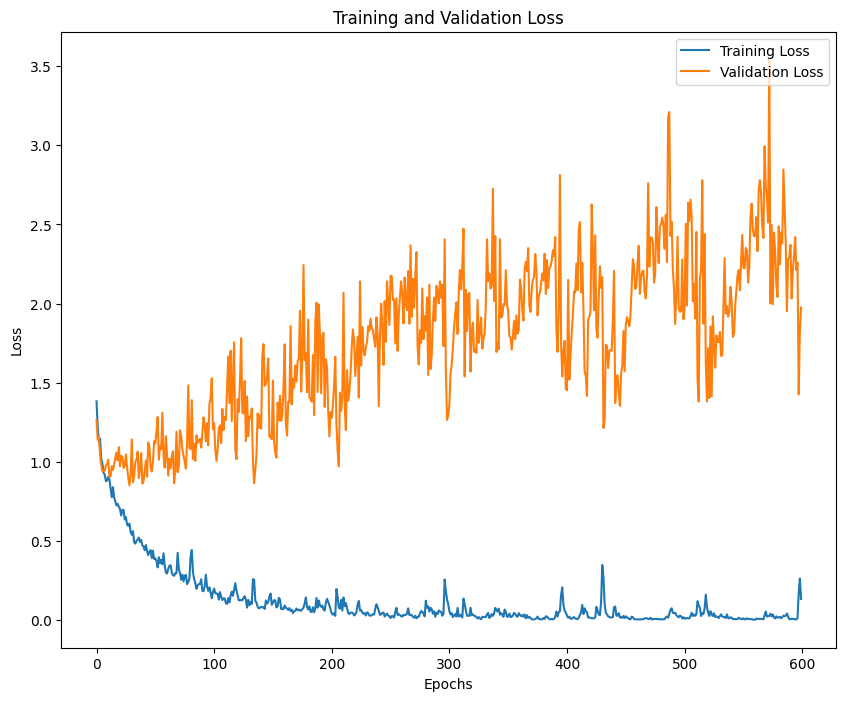

In [ ]:
plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 1)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 222, 222, 128)     1280      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                 

**AlexNet**

In [ ]:
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define AlexNet model
model4 = models.Sequential([
    resize_and_rescale, # Assuming this is a predefined layer for resizing and rescaling
    data_augmentation,  # Assuming this is a predefined layer for data augmentation
    layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape[1:]),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model4.build(input_shape=input_shape)




In [ ]:
model4.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model4.fit(
    train_ds,
    epochs=800,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 800

Epoch 1/800
20/20 [==============================] - 3s 47ms/step - loss: 1.3804 - accuracy: 0.3246 - val_loss: 1.4053 - val_accuracy: 0.2083
Epoch 2/800
20/20 [==============================] - 1s 36ms/step - loss: 1.3133 - accuracy: 0.3475 - val_loss: 1.2234 - val_accuracy: 0.4306
Epoch 3/800
20/20 [==============================] - 1s 36ms/step - loss: 1.0744 - accuracy: 0.4763 - val_loss: 1.1201 - val_accuracy: 0.3611
Epoch 4/800
20/20 [==============================] - 1s 36ms/step - loss: 1.0973 - accuracy: 0.5057 - val_loss: 0.9744 - val_accuracy: 0.4028
Epoch 5/800
20/20 [==============================] - 1s 36ms/step - loss: 0.9718 - accuracy: 0.5253 - val_loss: 1.0824 - val_accuracy: 0.4306
Epoch 6/800
20/20 [==============================] - 1s 42ms/step - loss: 0.9530 - accuracy: 0.5808 - val_loss: 1.0427 - val_accuracy: 0.3889
Epoch 7/800
20/20 [==============================] - 1s 51ms/step - loss: 0.9559 - accuracy: 0.5269 - val_loss: 1.0468 - val_accuracy: 0.4722
Epoch 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

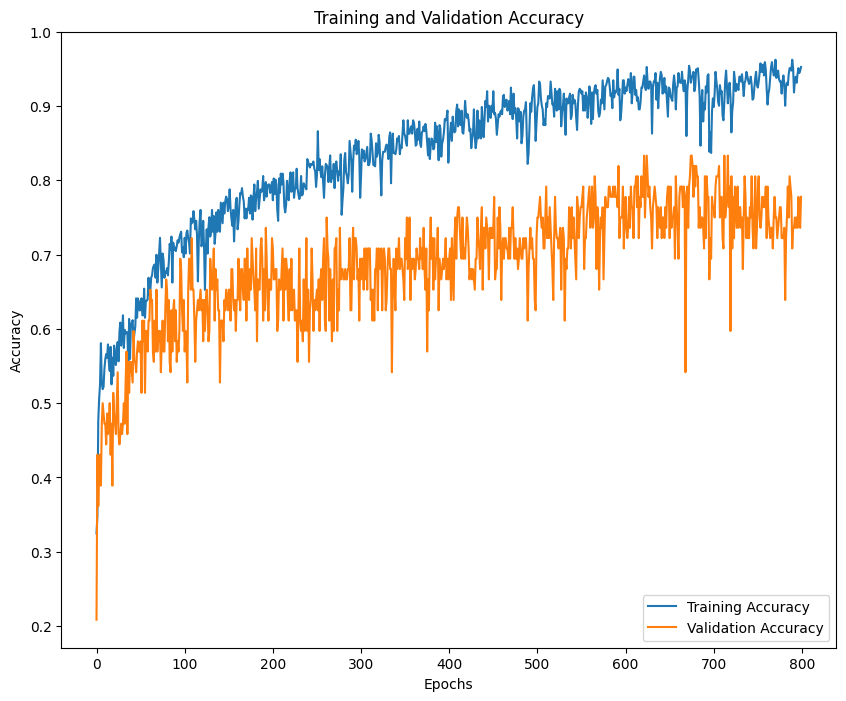

In [ ]:

plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')




plt.show()

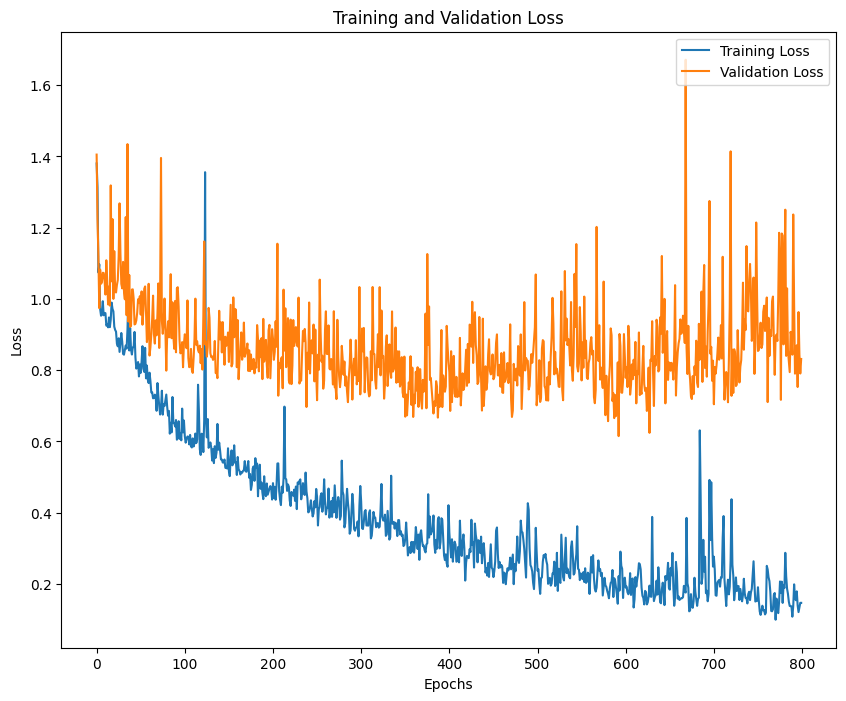

In [ ]:
plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model4.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 1)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 54, 54, 96)        11712     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 12, 12, 256)       0         
 ng2D)                                                

In [ ]:
scores = model4.evaluate(val_ds)
scores = model4.evaluate(train_ds)
scores = model4.evaluate(test_ds)

10/10 [==============================] - 1s 77ms/step - loss: 3.5412 - accuracy: 0.6159


CNN with 800 **epoch**

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model5 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model5.build(input_shape=input_shape)

In [ ]:
model5.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model5.fit(
    train_ds,
    epochs=800,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 800

Epoch 1/800
20/20 [==============================] - 123s 967ms/step - loss: 1.3397 - accuracy: 0.3197 - val_loss: 1.1834 - val_accuracy: 0.4583
Epoch 2/800
20/20 [==============================] - 2s 100ms/step - loss: 1.1051 - accuracy: 0.4812 - val_loss: 0.9662 - val_accuracy: 0.5417
Epoch 3/800
20/20 [==============================] - 2s 106ms/step - loss: 0.9468 - accuracy: 0.5791 - val_loss: 0.9575 - val_accuracy: 0.5278
Epoch 4/800
20/20 [==============================] - 2s 102ms/step - loss: 0.9421 - accuracy: 0.5481 - val_loss: 1.1223 - val_accuracy: 0.4861
Epoch 5/800
20/20 [==============================] - 2s 99ms/step - loss: 0.8870 - accuracy: 0.5873 - val_loss: 1.0445 - val_accuracy: 0.4861
Epoch 6/800
20/20 [==============================] - 2s 99ms/step - loss: 0.8606 - accuracy: 0.5791 - val_loss: 0.8914 - val_accuracy: 0.6250
Epoch 7/800
20/20 [==============================] - 2s 99ms/step - loss: 0.7886 - accuracy: 0.6150 - val_loss: 1.0103 - val_accuracy: 0.5833


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

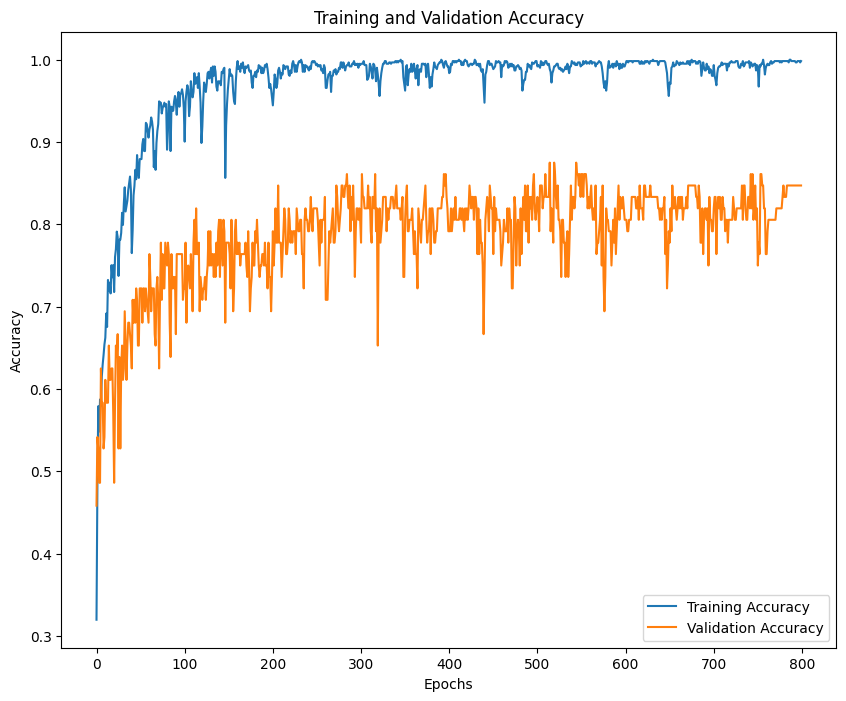

In [ ]:

plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')




plt.show()

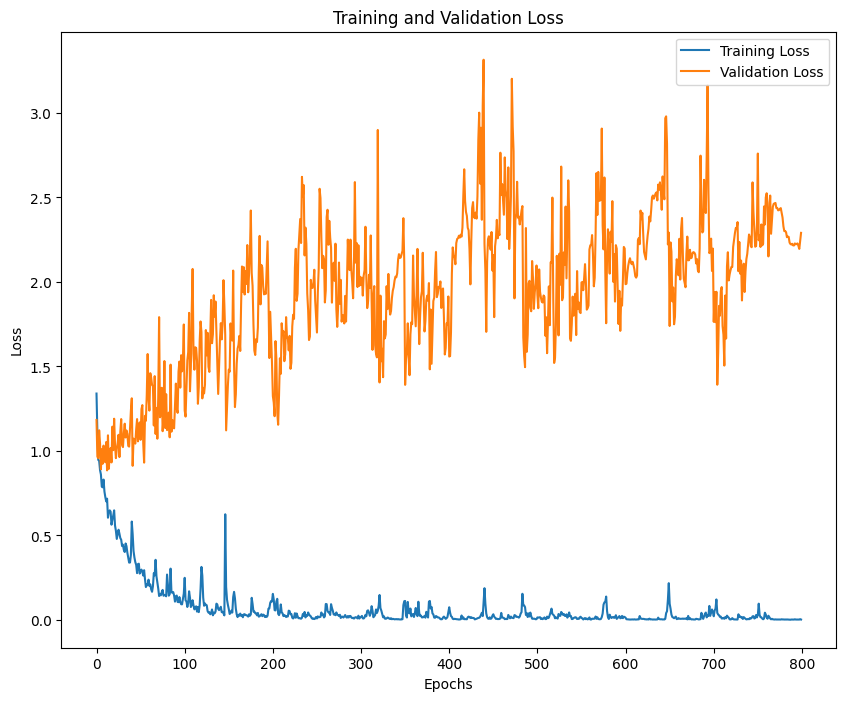

In [ ]:
plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
scores = model5.evaluate(val_ds)
scores = model5.evaluate(train_ds)
scores = model5.evaluate(test_ds)

10/10 [==============================] - 64s 204ms/step - loss: 5.0430 - accuracy: 0.6286


**AlexNet with 1000 epoch**


In [ ]:
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define AlexNet model
model6 = models.Sequential([
    resize_and_rescale, # Assuming this is a predefined layer for resizing and rescaling
    data_augmentation,  # Assuming this is a predefined layer for data augmentation
    layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape[1:]),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model6.build(input_shape=input_shape)




In [ ]:
model6.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model6.fit(
    train_ds,
    epochs=1000,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 1000

Epoch 1/1000
20/20 [==============================] - 120s 6s/step - loss: 1.3118 - accuracy: 0.3083 - val_loss: 1.0967 - val_accuracy: 0.4861
Epoch 2/1000
20/20 [==============================] - 121s 6s/step - loss: 1.1098 - accuracy: 0.4535 - val_loss: 0.9817 - val_accuracy: 0.5000
Epoch 3/1000
20/20 [==============================] - 116s 6s/step - loss: 1.0284 - accuracy: 0.4943 - val_loss: 1.2244 - val_accuracy: 0.3333
Epoch 4/1000
20/20 [==============================] - 120s 6s/step - loss: 1.2000 - accuracy: 0.4095 - val_loss: 1.0587 - val_accuracy: 0.4306
Epoch 5/1000
20/20 [==============================] - 117s 6s/step - loss: 0.9872 - accuracy: 0.4976 - val_loss: 0.9694 - val_accuracy: 0.4722
Epoch 6/1000
 1/20 [>.............................] - ETA: 2:12 - loss: 0.9466 - accuracy: 0.5312

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:

plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')




plt.show()

In [ ]:
plt.figure(figsize=(10,8))


plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
scores = model6.evaluate(val_ds)
scores = model6.evaluate(train_ds)
scores = model6.evaluate(test_ds)